# Task 2 - J41325c - Ashish Tara Shivakumar Ireddy

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [45]:
def Function (x,y):
  return ((x**2+y-11)**2 + (x+y**2-7)**2) # Himmelblau's function

In [57]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(X, Y)

Z = Function(X,Y)

def grad(x,y):
  return np.array([x/np.sqrt((x**2+y-11)**2 + (x+y**2-7)**2), y/np.sqrt((x**2+y-11)**2 + (x+y**2-7)**2)])

In [88]:
def Gradient(xm, rate):
    
  eps = 0.0001
  n = 1 #iterations
  
  xvals = []
  yvals = []
  inter = []
    
  xn = np.subtract(xm, rate*grad(xm[0],xm[1]))#min

  xvals = np.append(xvals, xn[0])
  yvals = np.append(yvals, xn[1])
    
  while np.linalg.norm(np.subtract(xn, xm)) > eps:
    
    if (np.random.randint(0,2)==0):
      xm[0] = xn[0]
      xn[0] = xm[0] - rate*grad(xm[0], xm[1])[0]
      inter = np.append(inter, np.linalg.norm(np.subtract(xn, xm)))
    else:
      xm[1] = xn[1]
      xn[1] = xm[1] - rate*grad(xm[0], xm[1])[1]
      inter = np.append(inter, np.linalg.norm(np.subtract(xn, xm)))
    
    n +=1
    xvals = np.append(xvals, xn[0])
    yvals = np.append(yvals, xn[1])
  
  return (xn, n, xvals, yvals, inter)

In [112]:
def plot(in_xvals, in_yvals, x1):
    
    plt.figure(1)
    graph = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.plot(x1[0], x1[1], 'ro')
    plt.plot(in_xvals, in_yvals, 'ro')
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.title(" Himmelblau's Function using Gradient Descent")
    plt.show()

Gradient Descent :

Minimum for the Himmelblau's Function :  [0. 0.]

                           Iterations :  9

                       X Values Array :  [-5.97891815 -4.97204915 -3.9595939  -2.95       -1.97171573 -1.97171573
 -0.99122942  0.          0.        ]

                       Y Values Array :  [1.99297272 1.99297272 1.99297272 1.99297272 1.99297272 0.99
 0.99       0.99       0.        ]


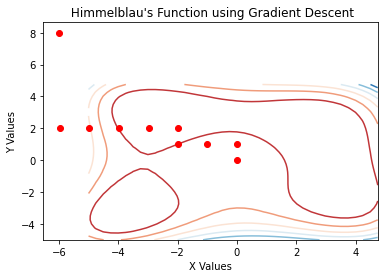

In [142]:
np.random.seed(22)

Experiment = Gradient(np.random.randint(-10,10,2), 0.1)

print("Gradient Descent :")
print("\nMinimum for the Himmelblau's Function : ", Experiment[0])
print("\n                           Iterations : ", Experiment[1])
print("\n                       X Values Array : ", Experiment[2])
print("\n                       Y Values Array : ", Experiment[3])

plot(Experiment[2], Experiment[3], np.random.randint(-10,10,2))

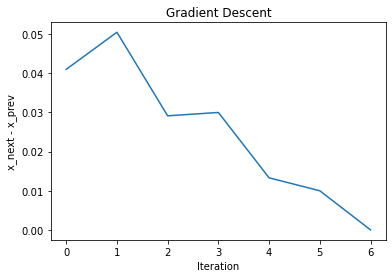

In [117]:
temp = Experiment[4][1:]
legend = np.arange(len(temp))

plt.plot(legend, temp)
plt.title("Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("x_next - x_prev")
plt.show()

In [133]:
#Adam Optimization 

def Adam(xin, lrate):
    
  alpha=lrate
  beta_1=0.9
  beta_2=0.999
  
  eps=1e-8
  epsilon=0.0001
    
  xvals = []
  yvals = []
  inter2 =[]

  m = np.array([0,0])
  v = np.array([0,0])
  i=1
  g = grad(xin[0], xin[1])
  m = beta_1 * m + (1 - beta_1) * g
  v = beta_2 * v + (1 - beta_2) * np.power(g, 2)
  m_hat = m / (1 - np.power(beta_1, i))
  v_hat =v / (1 - np.power(beta_2, i))
  x = xin - alpha * m_hat / (np.sqrt(v_hat) + eps)
  
  xvals = np.append(xvals, x[0])
  yvals = np.append(yvals, x[1])
  inter2 = np.append(inter2, np.linalg.norm(np.subtract(x,xin)) )
    
  while np.linalg.norm(np.subtract(x,xin)) > epsilon:
    xin=x
    g = grad(xin[0], xin[1])
    m = beta_1 * m + (1 - beta_1) * g
    v = beta_2 * v + (1 - beta_2) * np.power(g, 2)
    m_hat = m / (1 - np.power(beta_1, i))
    v_hat =v / (1 - np.power(beta_2, i))
    x = xin - alpha * m_hat / (np.sqrt(v_hat) + eps)
    i+=1
    xvals = np.append(xvals, x[0])
    yvals = np.append(yvals, x[1])
    
    inter2 = np.append(inter2 ,np.linalg.norm(np.subtract(x,xin)) )

  return ( x, i, xvals, yvals, inter2)

In [153]:
def plot2(in_xvals, in_yvals, x1):
    
    plt.figure(1)
    graph = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.plot(x1[0], x1[1], 'ro')
    plt.plot(in_xvals, in_yvals, 'ro')
    plt.xlabel("X Values")
    plt.ylabel("Y Values")
    plt.title(" Himmelblau's Function using Adam Optimization")
    plt.show()

Adams Optimization: 

Minimum for the Himmelblau's Function :  [-0.00148672  0.00031534]

                           Iterations :  162


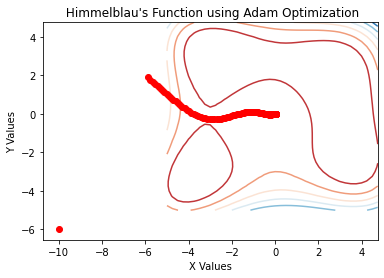

In [154]:
np.random.seed(22)

Experiment2 = Adam(np.random.randint(-10,10,2), 0.1)

print("Adams Optimization: ")
print("\nMinimum for the Himmelblau's Function : ", Experiment2[0])
print("\n                           Iterations : ", Experiment2[1])
#print("\n                       X Values Array : ", Experiment2[2])
#print("\n                       Y Values Array : ", Experiment2[3])

plot2(Experiment2[2], Experiment2[3], np.random.randint(-10,10,2))

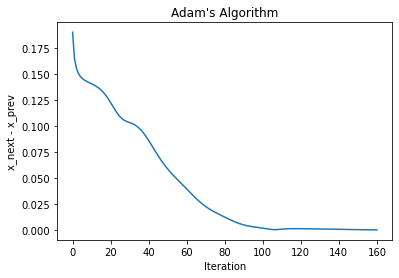

In [155]:
temp2 = Experiment2[4][1:]
legend2 = np.arange(len(temp2))

plt.plot(legend2, temp2)
plt.title("Adam's Algorithm")
plt.xlabel("Iteration")
plt.ylabel("x_next - x_prev")
plt.show()